<a href="https://colab.research.google.com/github/YangRui525/Comparing-OAD-and-TIC-Studies/blob/main/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=357520dc5ec448c50c85e5ad6e88504b9d87cb1190040565ce432b7f96164465
  Stored in directory: /root/.cache/pip/wheels/d4/13/91/2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap


In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=70391da7531102c24ba39e35c3fbeab885b7646c07d2fdb27a82c7bb6f7e3ff8
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=36bc4ec3f4f9e9249c36c1c151a9eddc44062ba374404ce03af426ed757c75dc
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
import umap
from umap.umap_ import UMAP

In [ ]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords=stopwords.words("english")
from gensim.models.phrases import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora,models

In [ ]:
os.chdir("..")
datapath="/content/drive/MyDrive/PLOS MEDICINE/data.csv"

In [ ]:
data=pd.read_csv(datapath)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227893 entries, 0 to 227892
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Title             227893 non-null  object 
 1   Journal           227893 non-null  object 
 2   Type              227893 non-null  object 
 3   Abstract          197857 non-null  object 
 4   Publication Year  225493 non-null  float64
 5   WoS of Category   227836 non-null  object 
 6   Research Area     227836 non-null  object 
 7   Paper Citation    227893 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [ ]:
data.shape

(227893, 8)

In [ ]:
data=data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195463 entries, 0 to 195462
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Title             195463 non-null  object 
 1   Journal           195463 non-null  object 
 2   Type              195463 non-null  object 
 3   Abstract          195463 non-null  object 
 4   Publication Year  195463 non-null  float64
 5   WoS of Category   195463 non-null  object 
 6   Research Area     195463 non-null  object 
 7   Paper Citation    195463 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 11.9+ MB


In [ ]:
data["Type"].value_counts()

Article                                            164397
Review                                              17906
Article; Proceedings Paper                           6587
Proceedings Paper                                    3883
Editorial Material                                   1403
Article; Book Chapter                                 523
Letter                                                254
Note                                                  250
Review; Book Chapter                                   54
Article; Retracted Publication                         53
Article; Data Paper                                    53
Correction                                             33
Reprint                                                29
Article; Publication with Expression of Concern         7
News Item                                               5
Book Review                                             4
Discussion                                              4
Biographical-I

In [ ]:
data=data.loc[(data["Type"]=="Article")|(data["Type"]=="Review")].reset_index(drop=True)

In [ ]:
data.shape

(182303, 8)

In [ ]:
index=np.argwhere(np.array(data['Abstract'].str.lower().str.contains(
    "mimic-ii|mimic-iii|mimic-iv|mimic dataset|mimic ii|mimic iii|mimic iv|eicu|mimic data|medical information mart for intensive care|icu|intensive care unit|eicu-crd|amsterdamumcdb|hirid|pediatric intensive care database|pediatric intensive care unit database"))).T[0]
index.shape

(146727,)

In [ ]:
data=data.loc[index].reset_index(drop=True)
data.shape

(146727, 8)

In [ ]:
year_2021=data[data["Publication Year"]==2021]
year_2022=data[data["Publication Year"]==2022]

In [ ]:
year_2021.shape[0],year_2022.shape[0]

(16760, 15423)

In [ ]:
covid_2021=year_2021[year_2021["Abstract"].str.lower().str.contains("covid|coronavirus")]
covid_2022=year_2022[year_2022["Abstract"].str.lower().str.contains("covid|coronavirus")]

In [ ]:
covid_2021.shape[0],covid_2022.shape[0]

(5049, 4346)

In [ ]:
covid_2021.shape[0]/year_2021.shape[0],covid_2022.shape[0]/year_2022.shape[0]

(0.3012529832935561, 0.281786941580756)

In [ ]:
data_=data
data_=data_[data_["Publication Year"]>=2003]

In [ ]:
mimic_index=data_.index[data_["Abstract"].str.lower().str.contains(
    "mimic-ii|mimic-iii|mimic-iv|mimic dataset|mimic ii|mimic iii|mimic iv|mimic data|medical information mart for intensive care")]
mimic_index.shape

(1149,)

In [ ]:
data_=data_[data_["Publication Year"]>=2018]

In [ ]:
eicu_index=data_.index[data_["Abstract"].str.lower().str.contains(
    "eicu|eicu-crd")]
eicu_index.shape

(224,)

In [ ]:
data_=data_[data_["Publication Year"]>=2020]

In [ ]:
hirid_index=data_.index[data_["Abstract"].str.lower().str.contains(
    "hirid")]
hirid_index.shape

(1,)

In [ ]:
pediatric_index=data_.index[data_["Abstract"].str.lower().str.contains(
    "pediatric intensive care database|pediatric intensive care unit database")]
pediatric_index.shape

(10,)

In [ ]:
data_=data_[data_["Publication Year"]>=2021]

In [ ]:
amsterdam_index=data_.index[data_["Abstract"].str.lower().str.contains(
    "amsterdamumcdb")]
amsterdam_index.shape

(4,)

In [ ]:
database_index=np.concatenate((mimic_index,eicu_index,hirid_index,pediatric_index,amsterdam_index))

In [ ]:
database_index.shape

(1388,)

In [ ]:
database_index=np.unique(database_index)
database_index.shape

(1301,)

In [ ]:
other_index=np.argwhere(np.array(data["Abstract"].str.lower().str.contains("mimic-ii|mimic-iii|mimic-iv|mimic dataset|mimic ii|mimic iii|mimic iv|eicu|mimic data|medical information mart for intensive care|icu|intensive care unit|eicu-crd|amsterdamumcdb|hirid|pediatric intensive care database|pediatric intensive care unit database"))).T[0]
other_index=[i for i in other_index if i not in database_index]
len(other_index)

145426

In [ ]:
database_paper_publication_year=data["Publication Year"][database_index].value_counts().sort_index().to_frame()
database_paper_publication_year

Publication Year
2004.0                 1
2007.0                 1
2008.0                 2
2009.0                 1
2010.0                 4
2011.0                 2
2012.0                 3
2013.0                 5
2014.0                 9
2015.0                12
2016.0                14
2017.0                23
2018.0                53
2019.0                93
2020.0               169
2021.0               382
2022.0               519
2023.0                 8

In [ ]:
other_paper_publication_year=data["Publication Year"][other_index].value_counts().sort_index().to_frame()
other_paper_publication_year

Publication Year
1973.0                 1
1979.0                 1
1990.0                47
1991.0               583
1992.0               685
1993.0               827
1994.0               911
1995.0              1035
1996.0              1239
1997.0              1200
1998.0              1278
1999.0              1427
2000.0              1546
2001.0              1542
2002.0              1673
2003.0              1848
2004.0              1912
2005.0              2291
2006.0              2682
2007.0              2960
2008.0              3378
2009.0              3819
2010.0              4370
2011.0              5105
2012.0              5578
2013.0              6153
2014.0              6528
2015.0              7072
2016.0              7664
2017.0              8086
2018.0              8684
2019.0              9323
2020.0             12498
2021.0             16378
2022.0             14904
2023.0               198

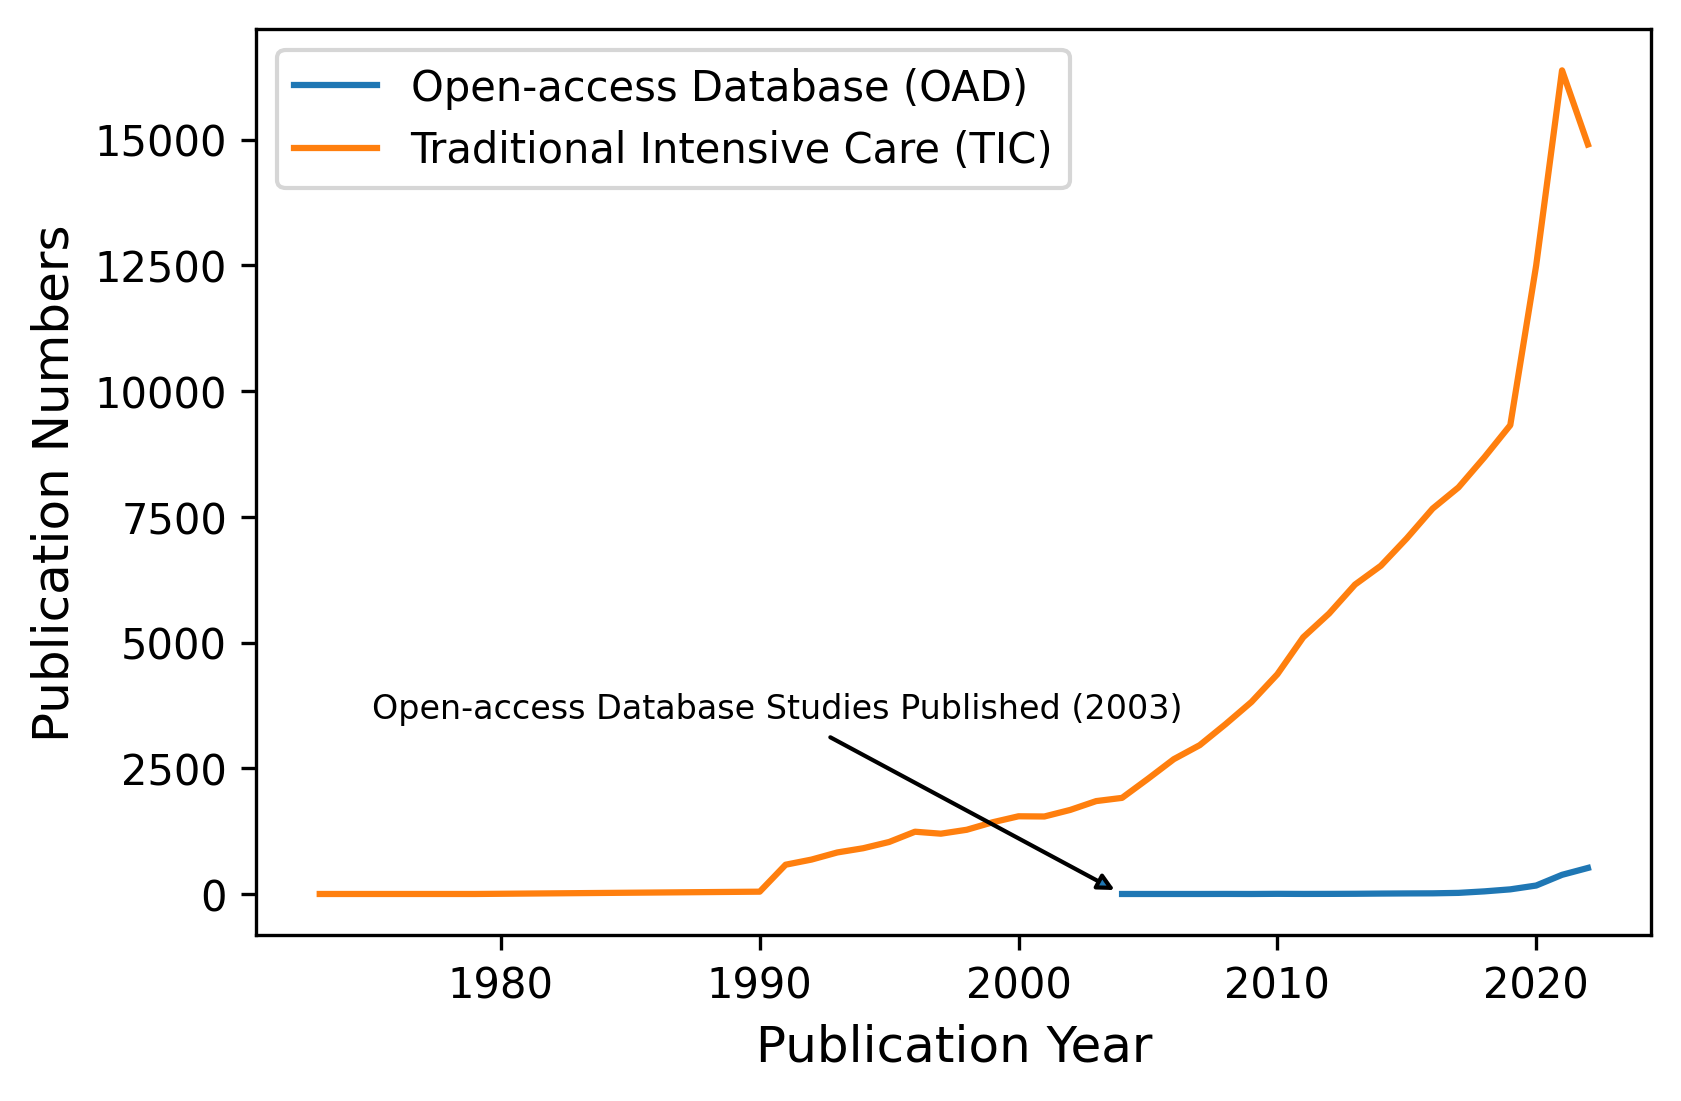

In [ ]:
plt.figure(dpi=300)
plt.plot(database_paper_publication_year[database_paper_publication_year.index<2023],label="Open-access Database (OAD)")
plt.plot(other_paper_publication_year[other_paper_publication_year.index<2023],label="Traditional Intensive Care (TIC)")
plt.xlabel("Publication Year",size=12)
plt.ylabel("Publication Numbers",size=12)
plt.annotate("Open-access Database Studies Published (2003)",xy=(2004,1),xytext=(1975,3500),arrowprops=dict(arrowstyle="-|>"),size=8)
#plt.title("A",loc="left",fontsize=16,fontweight="bold")
plt.legend()

In [ ]:
col=[color for name,color in mcolors.TABLEAU_COLORS.items()] 

In [ ]:
database_paper_research_area=(data["WoS of Category"][database_index].value_counts().head(10)/len(data["WoS of Category"][database_index])*100).to_frame()

In [ ]:
other_paper_research_area=(data["WoS of Category"][other_index].value_counts().head(10)/len(data["WoS of Category"][other_index])*100).to_frame()

In [ ]:
database_paper_research_area

WoS of Category
Medicine, General & Internal                              14.450423
Multidisciplinary Sciences                                 6.379708
Cardiac & Cardiovascular Systems                           6.149116
Critical Care Medicine                                     4.996157
Medical Informatics                                        3.689470
Computer Science, Interdisciplinary Application...         2.690238
Medicine, Research & Experimental                          2.075327
Oncology; Medicine, Research & Experimental                1.998463
Health Care Sciences & Services                            1.921599
Computer Science, Information Systems; Computer...         1.844735

In [ ]:
other_paper_research_area

WoS of Category
Critical Care Medicine                  12.400121
Medicine, General & Internal            10.824749
Pediatrics                               5.649609
Anesthesiology                           4.029541
Nursing                                  3.818437
Surgery                                  2.791110
Cardiac & Cardiovascular Systems         1.927441
Multidisciplinary Sciences               1.909562
Emergency Medicine                       1.899935
Pharmacology & Pharmacy                  1.868992

<ipython-input-44-099a1e164c12>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(database_paper_research_area.index,rotation=45,ha="right",size=12)
<ipython-input-44-099a1e164c12>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(other_paper_research_area.index,rotation=45,ha="right",size=12)


(0.0, 25.0)

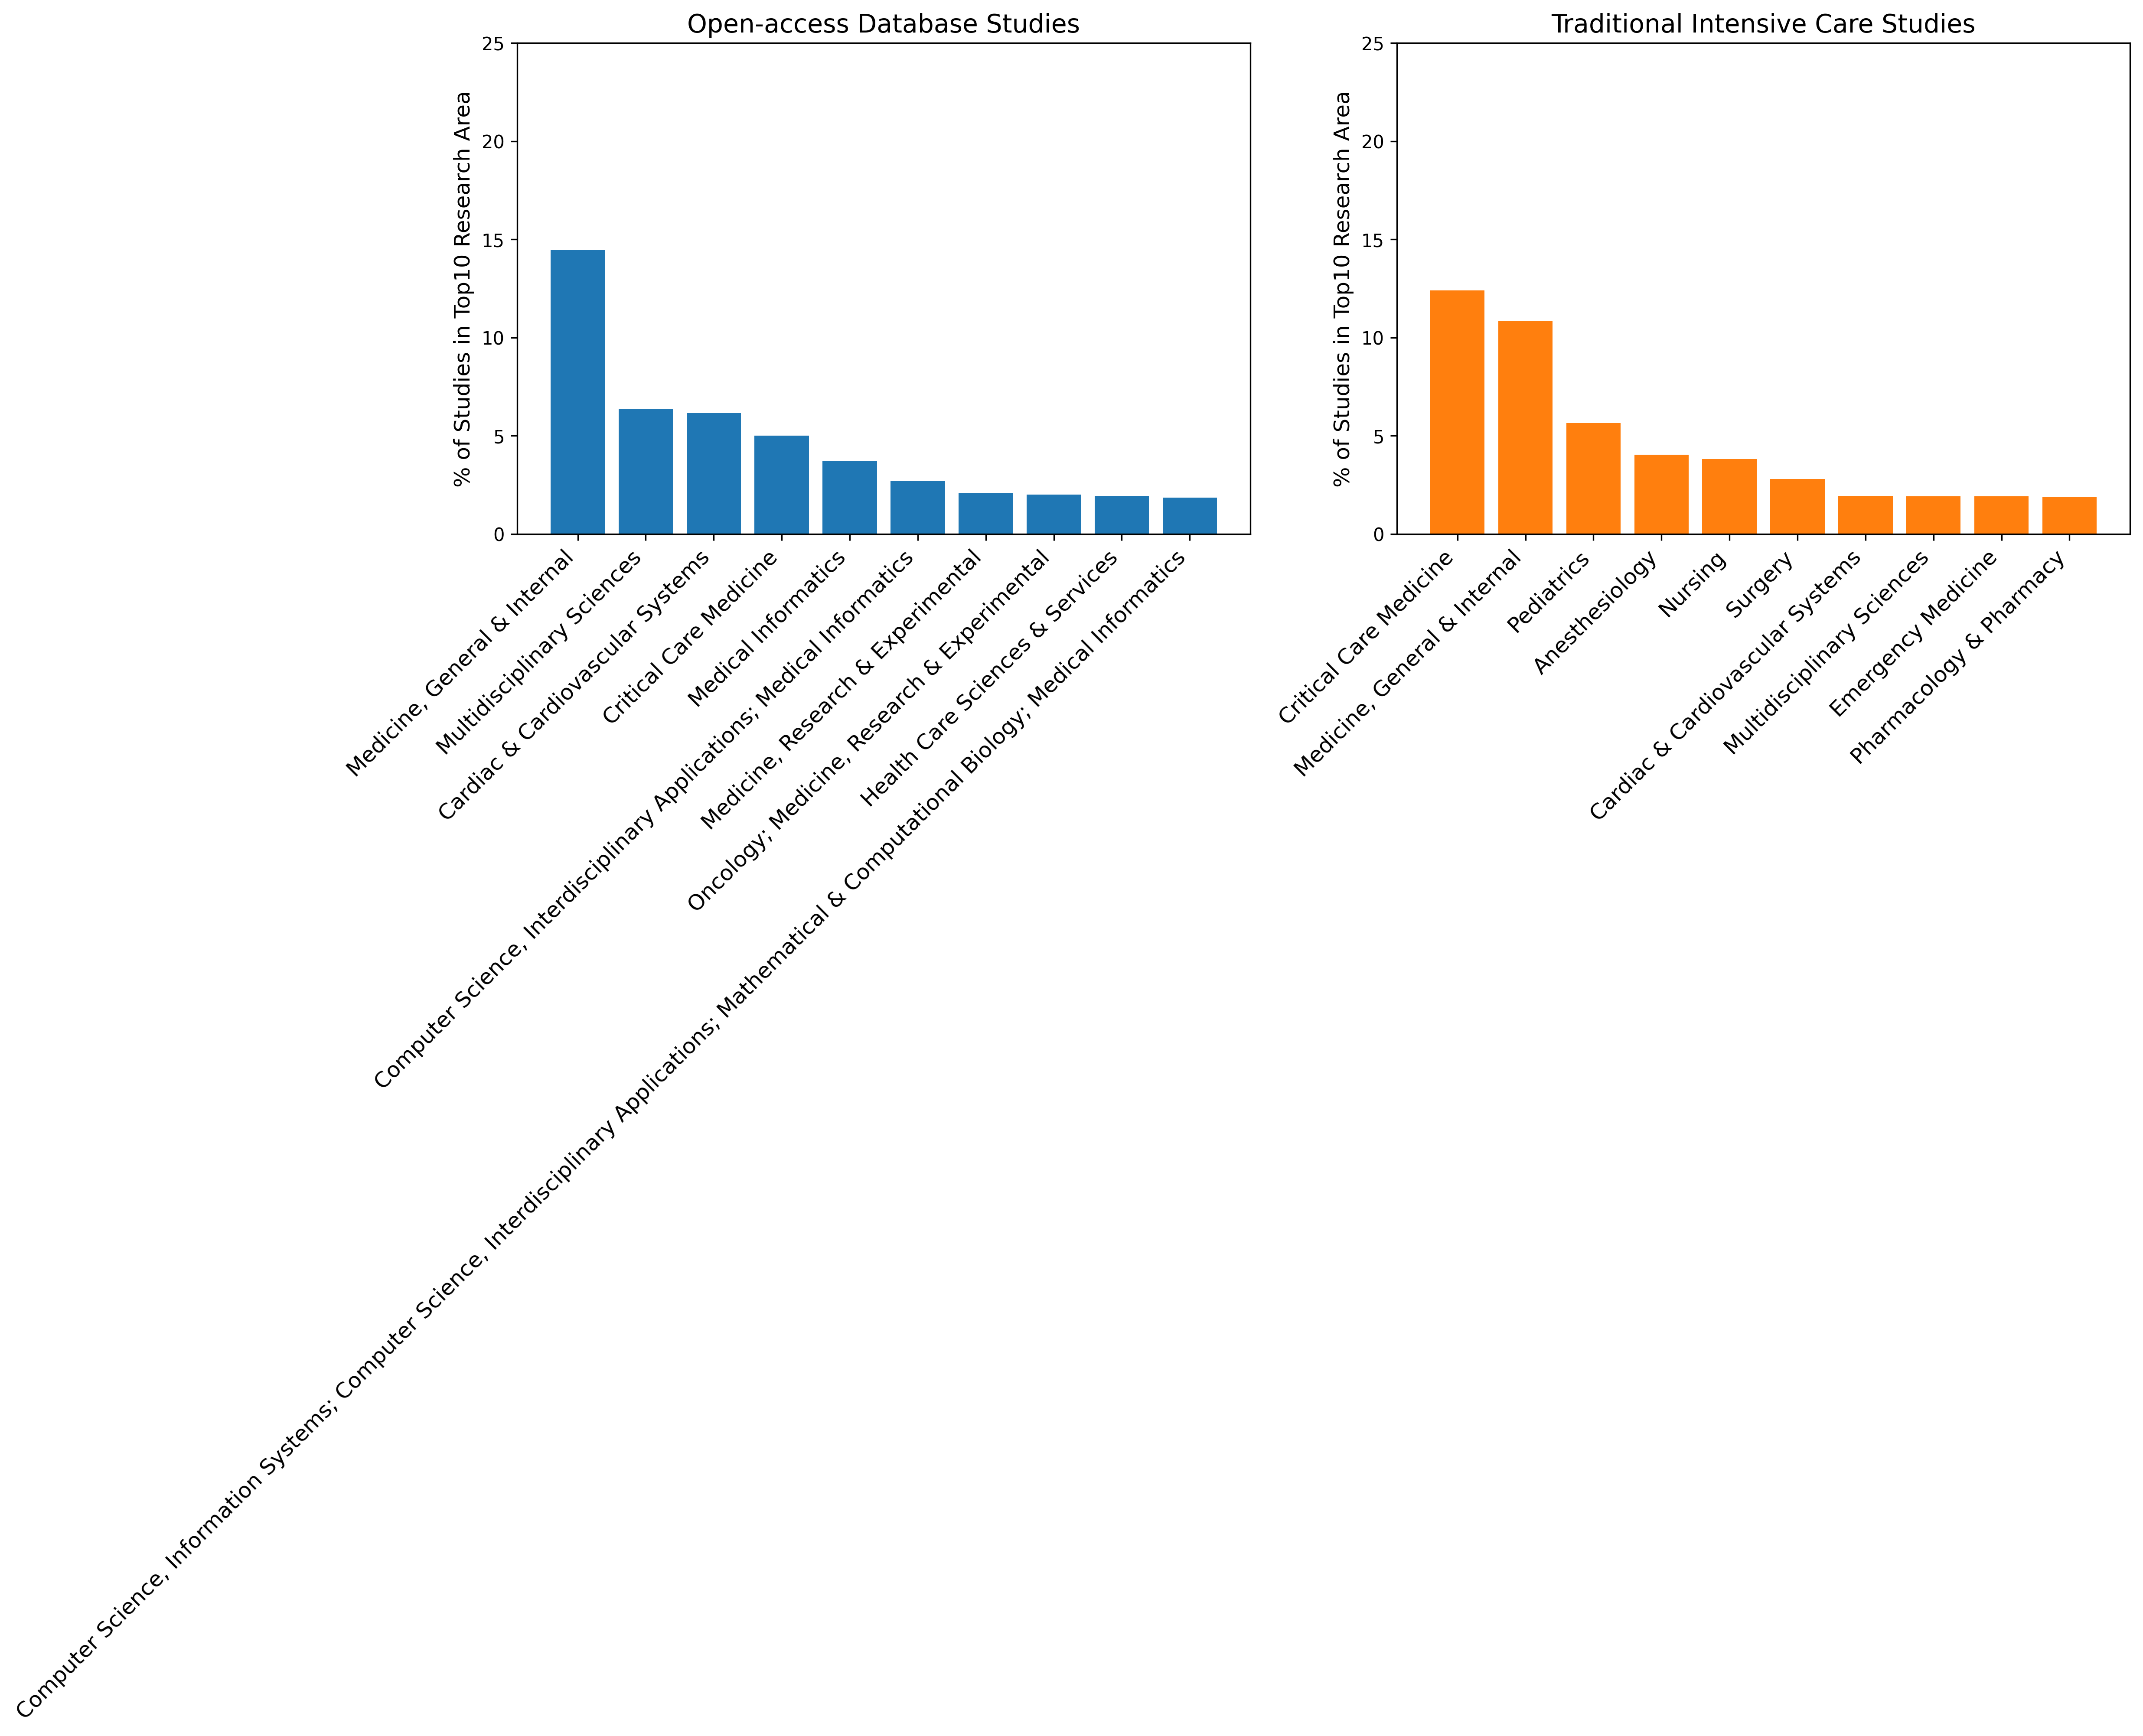

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,5),dpi=300)
ax[0].bar(database_paper_research_area.index,database_paper_research_area["WoS of Category"],color=col[0])
ax[0].set_ylabel("% of Studies in Top10 Research Area",size=12)
ax[0].set_xticklabels(database_paper_research_area.index,rotation=45,ha="right",size=12)
ax[0].set_title("Open-access Database (OAD)",size=14)
ax[0].set_ylim(0,25)
ax[1].bar(other_paper_research_area.index,other_paper_research_area["WoS of Category"],color=col[1])
ax[1].set_ylabel("% of Studies in Top10 Research Area",size=12)
ax[1].set_xticklabels(other_paper_research_area.index,rotation=45,ha="right",size=12)
ax[1].set_title("Traditional Intensive Care (TIC)",size=14)
ax[1].set_ylim(0,25)

In [ ]:
database_paper_journal=data["Journal"][database_index].value_counts().to_frame()
database_paper_journal=database_paper_journal[:20]

In [ ]:
other_paper_journal=data["Journal"][other_index].value_counts().to_frame()
other_paper_journal=other_paper_journal[:20]

<ipython-input-76-1dcd1e4e92e6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(database_paper_journal.index,rotation=45,ha="right",size=12)
<ipython-input-76-1dcd1e4e92e6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(other_paper_journal.index,rotation=45,ha="right",size=12)


Text(0.5, 1.0, 'Traditional Intensive Care (TIC)')

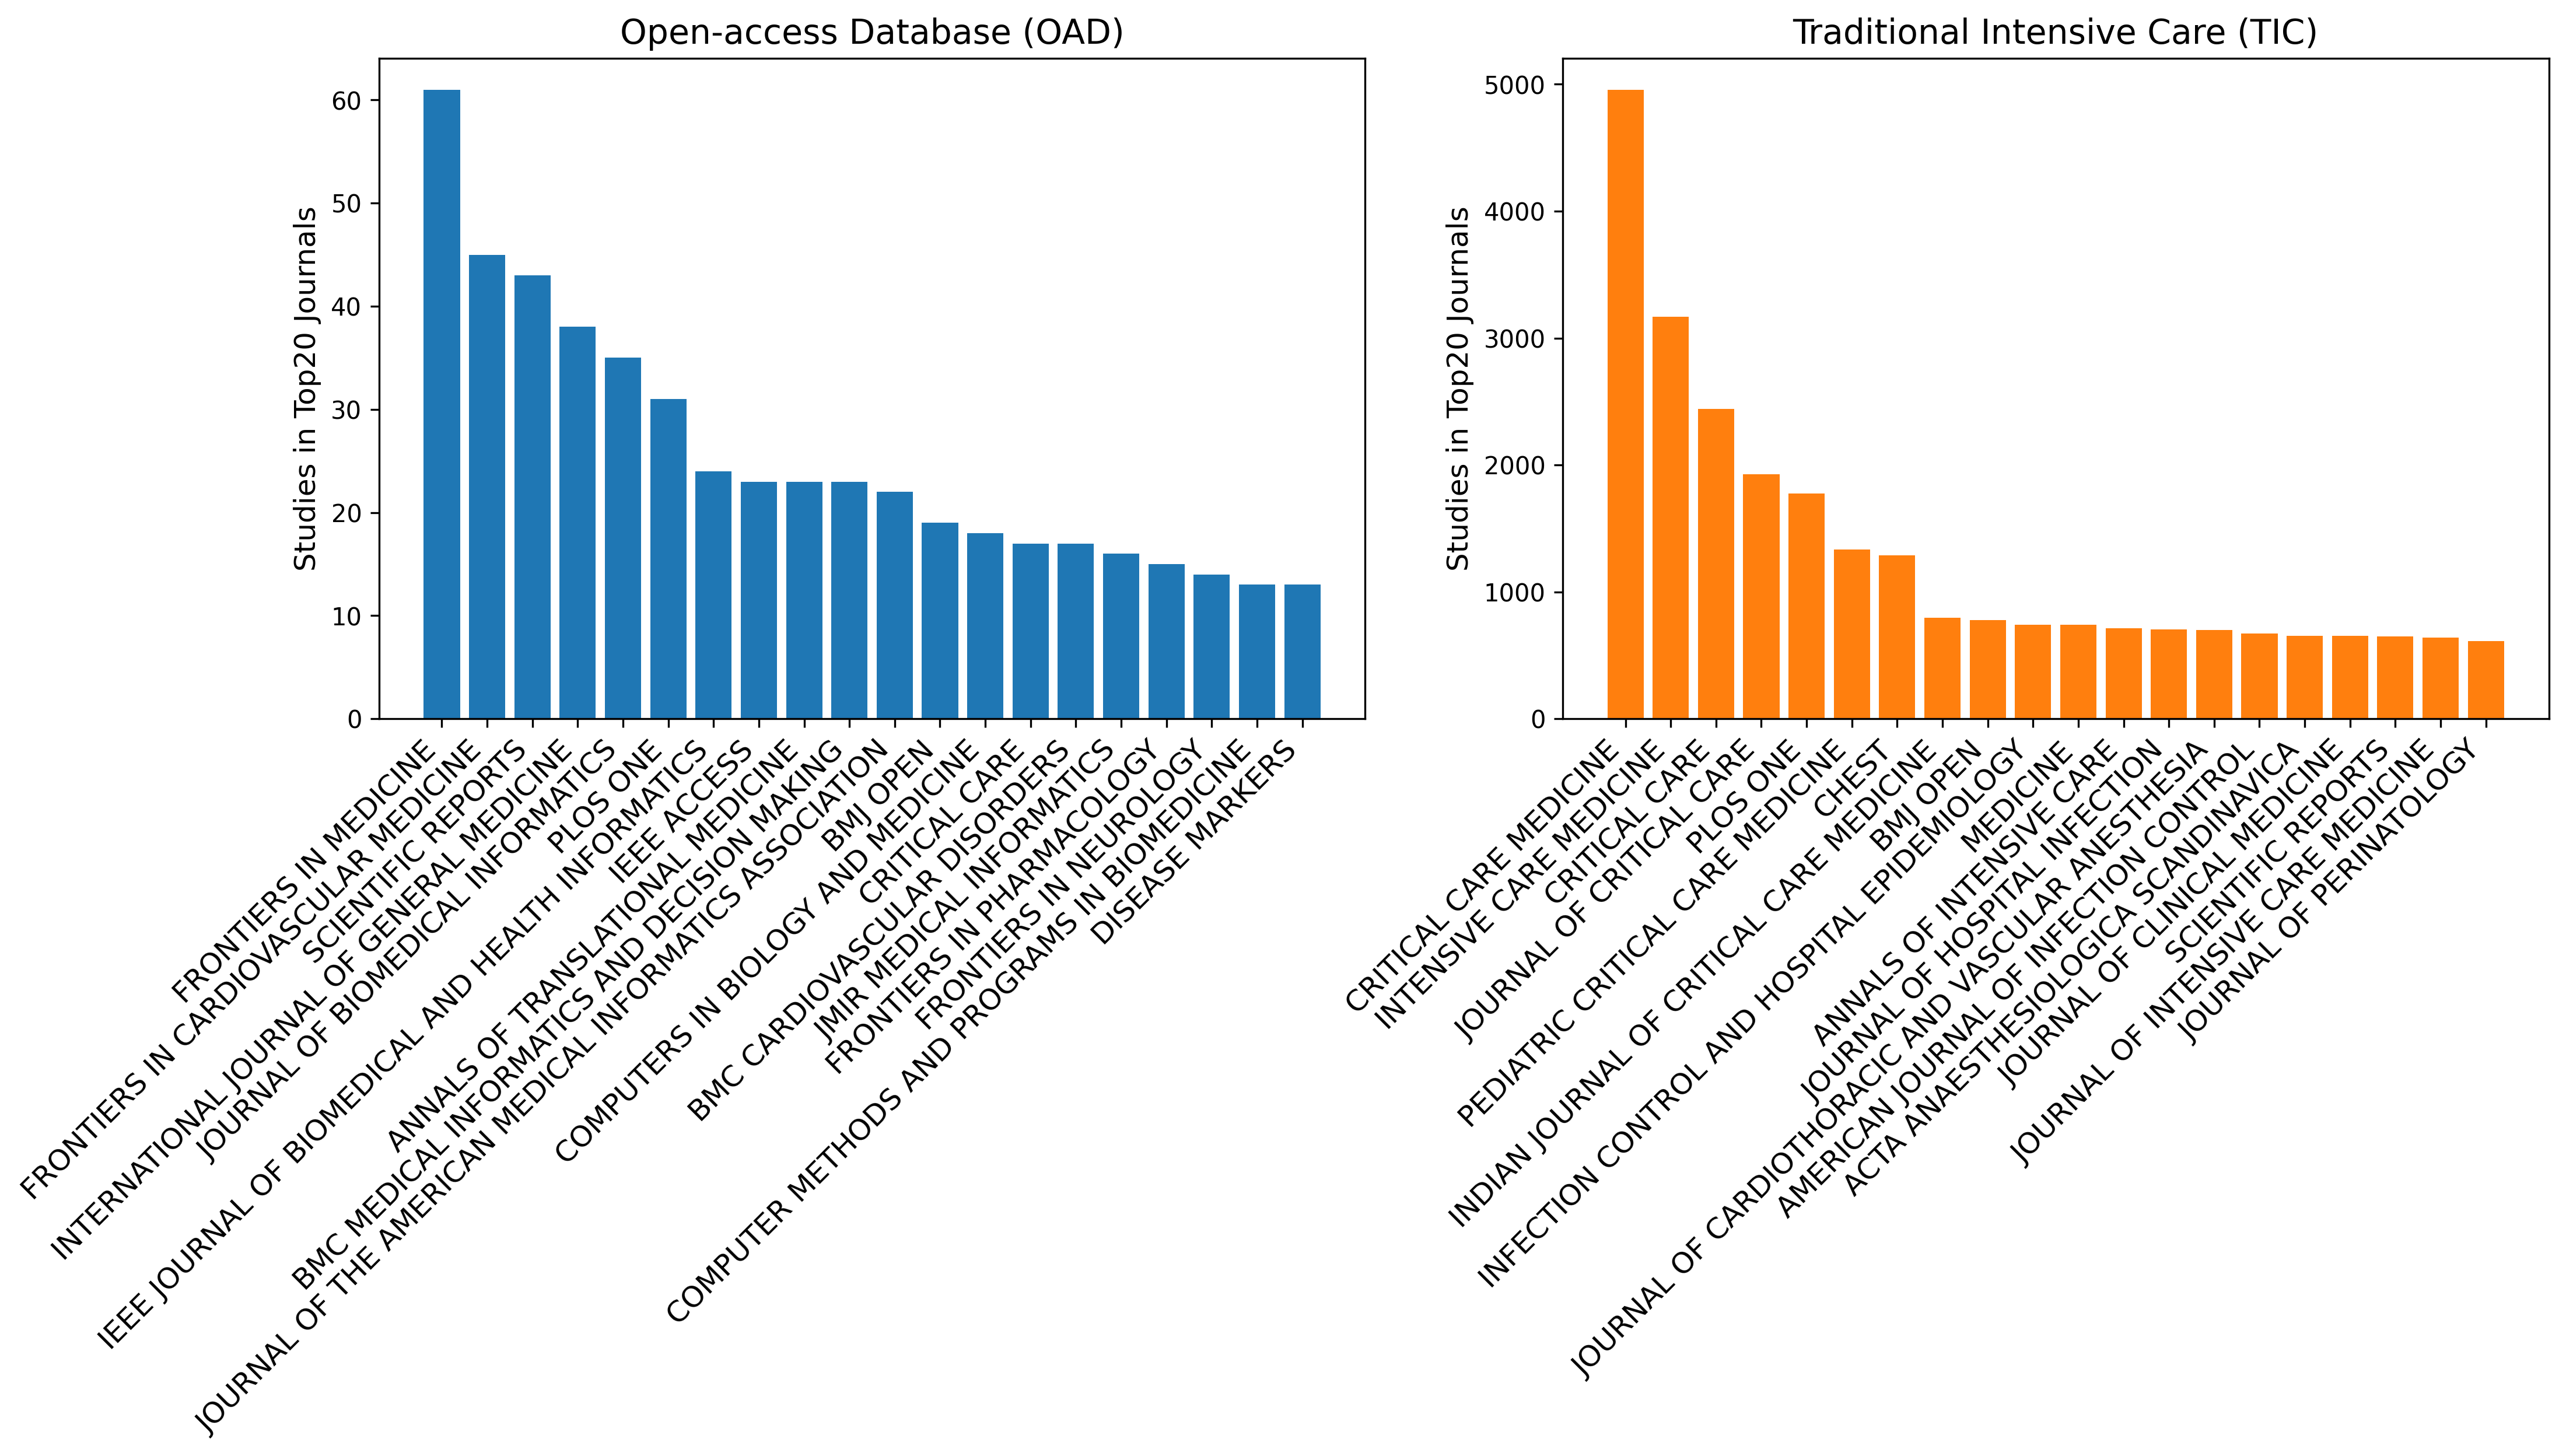

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,5),dpi=300)
ax[0].bar(database_paper_journal.index,database_paper_journal["Journal"],color=col[0])
ax[0].set_ylabel("Studies in Top20 Journals",size=12)
ax[0].set_xticklabels(database_paper_journal.index,rotation=45,ha="right",size=12)
ax[0].set_title("Open-access Database (OAD)",size=14)

ax[1].bar(other_paper_journal.index,other_paper_journal["Journal"],color=col[1])
ax[1].set_ylabel("Studies in Top20 Journals",size=12)
ax[1].set_xticklabels(other_paper_journal.index,rotation=45,ha="right",size=12)
ax[1].set_title("Traditional Intensive Care (TIC)",size=14)


In [ ]:
database_data=data.loc[database_index].reset_index(drop=False)
other_data=data.loc[other_index].reset_index(drop=False)
database_data.shape,other_data.shape

((1301, 9), (145426, 9))

In [ ]:
database_paper_journal

Journal
FRONTIERS IN MEDICINE                                    61
FRONTIERS IN CARDIOVASCULAR MEDICINE                     45
SCIENTIFIC REPORTS                                       43
INTERNATIONAL JOURNAL OF GENERAL MEDICINE                38
JOURNAL OF BIOMEDICAL INFORMATICS                        35
PLOS ONE                                                 31
IEEE JOURNAL OF BIOMEDICAL AND HEALTH INFORMATICS        24
IEEE ACCESS                                              23
ANNALS OF TRANSLATIONAL MEDICINE                         23
BMC MEDICAL INFORMATICS AND DECISION MAKING              23
JOURNAL OF THE AMERICAN MEDICAL INFORMATICS ASS...       22
BMJ OPEN                                                 19
COMPUTERS IN BIOLOGY AND MEDICINE                        18
CRITICAL CARE                                            17
BMC CARDIOVASCULAR DISORDERS                             17
JMIR MEDICAL INFORMATICS                                 16
FRONTIERS IN PHARMACOLOGY                                15
FRONTIERS IN NEUROLOGY                                   14
COMPUTER METHODS AND PROGRAMS IN BIOMEDICINE             13
DISEASE MARKERS                                          13

In [ ]:
other_paper_journal

Journal
CRITICAL CARE MEDICINE                                4958
INTENSIVE CARE MEDICINE                               3166
CRITICAL CARE                                         2444
JOURNAL OF CRITICAL CARE                              1927
PLOS ONE                                              1777
PEDIATRIC CRITICAL CARE MEDICINE                      1332
CHEST                                                 1288
INDIAN JOURNAL OF CRITICAL CARE MEDICINE               794
BMJ OPEN                                               780
INFECTION CONTROL AND HOSPITAL EPIDEMIOLOGY            743
MEDICINE                                               741
ANNALS OF INTENSIVE CARE                               712
JOURNAL OF HOSPITAL INFECTION                          705
JOURNAL OF CARDIOTHORACIC AND VASCULAR ANESTHESIA      699
AMERICAN JOURNAL OF INFECTION CONTROL                  670
ACTA ANAESTHESIOLOGICA SCANDINAVICA                    655
JOURNAL OF CLINICAL MEDICINE                           654
SCIENTIFIC REPORTS                                     648
JOURNAL OF INTENSIVE CARE MEDICINE                     640
JOURNAL OF PERINATOLOGY                                613

In [ ]:
database_citation=[]
for i in range(20):
  database_citation.append(sum(database_data[database_data["Journal"]==database_paper_journal.index[i]]["Paper Citation"]))

In [ ]:
other_citation=[]
for i in range(20):
  other_citation.append(sum(other_data[other_data["Journal"]==other_paper_journal.index[i]]["Paper Citation"]))

In [ ]:
pd.DataFrame(database_citation)

0
0   150
1    63
2   973
3   120
4   658
5   375
6   210
7   223
8    82
9   175
10  596
11  112
12  276
13  354
14   18
15   86
16   10
17   11
18  110
19   51

In [ ]:
pd.DataFrame(other_citation)

0
0   372139
1   196056
2   120649
3    40428
4    32748
5    32636
6   101947
7     5316
8     7607
9    28838
10    6852
11   15623
12   22029
13   12066
14   17754
15   12046
16    3685
17    5684
18    5672
19   12177

In [ ]:
database_average_citation=[]
for i in range(20):
  database_average_citation.append(database_citation[i]/database_paper_journal["Journal"][i])

In [ ]:
database_average_citation

[2.459016393442623,
 1.4,
 22.627906976744185,
 3.1578947368421053,
 18.8,
 12.096774193548388,
 8.75,
 9.695652173913043,
 3.5652173913043477,
 7.608695652173913,
 27.09090909090909,
 5.894736842105263,
 15.333333333333334,
 20.823529411764707,
 1.0588235294117647,
 5.375,
 0.6666666666666666,
 0.7857142857142857,
 8.461538461538462,
 3.923076923076923]

In [ ]:
other_average_citation=[]
for i in range(20):
  other_average_citation.append(other_citation[i]/other_paper_journal["Journal"][i])

In [ ]:
other_average_citation

[75.0582896329165,
 61.92545799115603,
 49.36538461538461,
 20.979761286974572,
 18.428812605514914,
 24.5015015015015,
 79.15139751552795,
 6.69521410579345,
 9.752564102564103,
 38.81292059219381,
 9.246963562753036,
 21.94241573033708,
 31.2468085106383,
 17.261802575107296,
 26.498507462686568,
 18.39083969465649,
 5.634556574923548,
 8.771604938271604,
 8.8625,
 19.864600326264274]

In [ ]:
def data_preprocessing(text):
    text=gensim.utils.simple_preprocess(text)
    text=[word for word in text if word not in stopwords]
    text=[WordNetLemmatizer().lemmatize(word,"v") for word in text]
    text=[WordNetLemmatizer().lemmatize(word,"n") for word in text]
    return text

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
data["Abstract"]=data["Abstract"].apply(lambda x:data_preprocessing(x))
data["Abstract"]

0         [background, vitamin, deficiency, common, nutr...
1         [selective, decontamination, digestive, tract,...
2         [purpose, systematic, review, explore, describ...
3         [evolution, intensive, care, medicine, integra...
4         [sixteen, risk, factor, nosocomial, pneumonia,...
                                ...                        
146722    [objective, objective, study, compare, surgica...
146723    [background, cardiac, rehabilitation, strongly...
146724    [objective, study, aim, ass, effectiveness, tr...
146725    [background, penetrate, inferior, vena, caval,...
146726    [blood, urea, nitrogen, serum, albumin, level,...
Name: Abstract, Length: 146727, dtype: object

In [ ]:
def n_gram(text):
    bigram=Phrases(text,min_count=10, threshold=20)
    trigram=Phrases(bigram[text],min_count=10, threshold=20)
    bigram_mod=Phraser(bigram)
    trigram_mod=Phraser(trigram)
    return trigram_mod[bigram_mod[text]]

In [ ]:
data["Abstract"]=n_gram(data["Abstract"])

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
data["Abstract"]

0         [background, vitamin_deficiency, common, nutri...
1         [selective_decontamination_digestive_tract, sd...
2         [purpose, systematic_review, explore, describe...
3         [evolution, intensive_care, medicine, integrat...
4         [sixteen, risk_factor, nosocomial_pneumonia, p...
                                ...                        
146722    [objective, objective, study, compare, surgica...
146723    [background, cardiac, rehabilitation, strongly...
146724    [objective, study, aim, ass, effectiveness, tr...
146725    [background, penetrate, inferior_vena, caval, ...
146726    [blood_urea_nitrogen, serum_albumin_level, ind...
Name: Abstract, Length: 146727, dtype: object

In [ ]:
def create_dictionary(text):
    dictionary=corpora.Dictionary(text)
    dictionary.filter_extremes(no_below=2,keep_n=100000)
    return dictionary

In [ ]:
dictionary=create_dictionary(data["Abstract"])

In [ ]:
def create_corpus(text):
    bow_corpus = [dictionary.doc2bow(doc) for doc in text]
    return bow_corpus

In [ ]:
bow_corpus=create_corpus(data["Abstract"])

In [ ]:
def create_sparse_tfidf_corpus(bow_corpus):
    tfidf=models.TfidfModel(bow_corpus)
    tfidf_corpus=tfidf[bow_corpus]
    sparse_tfidf_corpus= gensim.matutils.corpus2csc(tfidf_corpus, printprogress=500).T
    return sparse_tfidf_corpus

In [ ]:
sparse_tfidf_corpus=create_sparse_tfidf_corpus(bow_corpus)

In [ ]:
UMAP=UMAP(n_neighbors=30,n_components=4,min_dist=0.2,metric="cosine",random_state=37)

In [ ]:
reduced_tfidf=UMAP.fit_transform(sparse_tfidf_corpus)

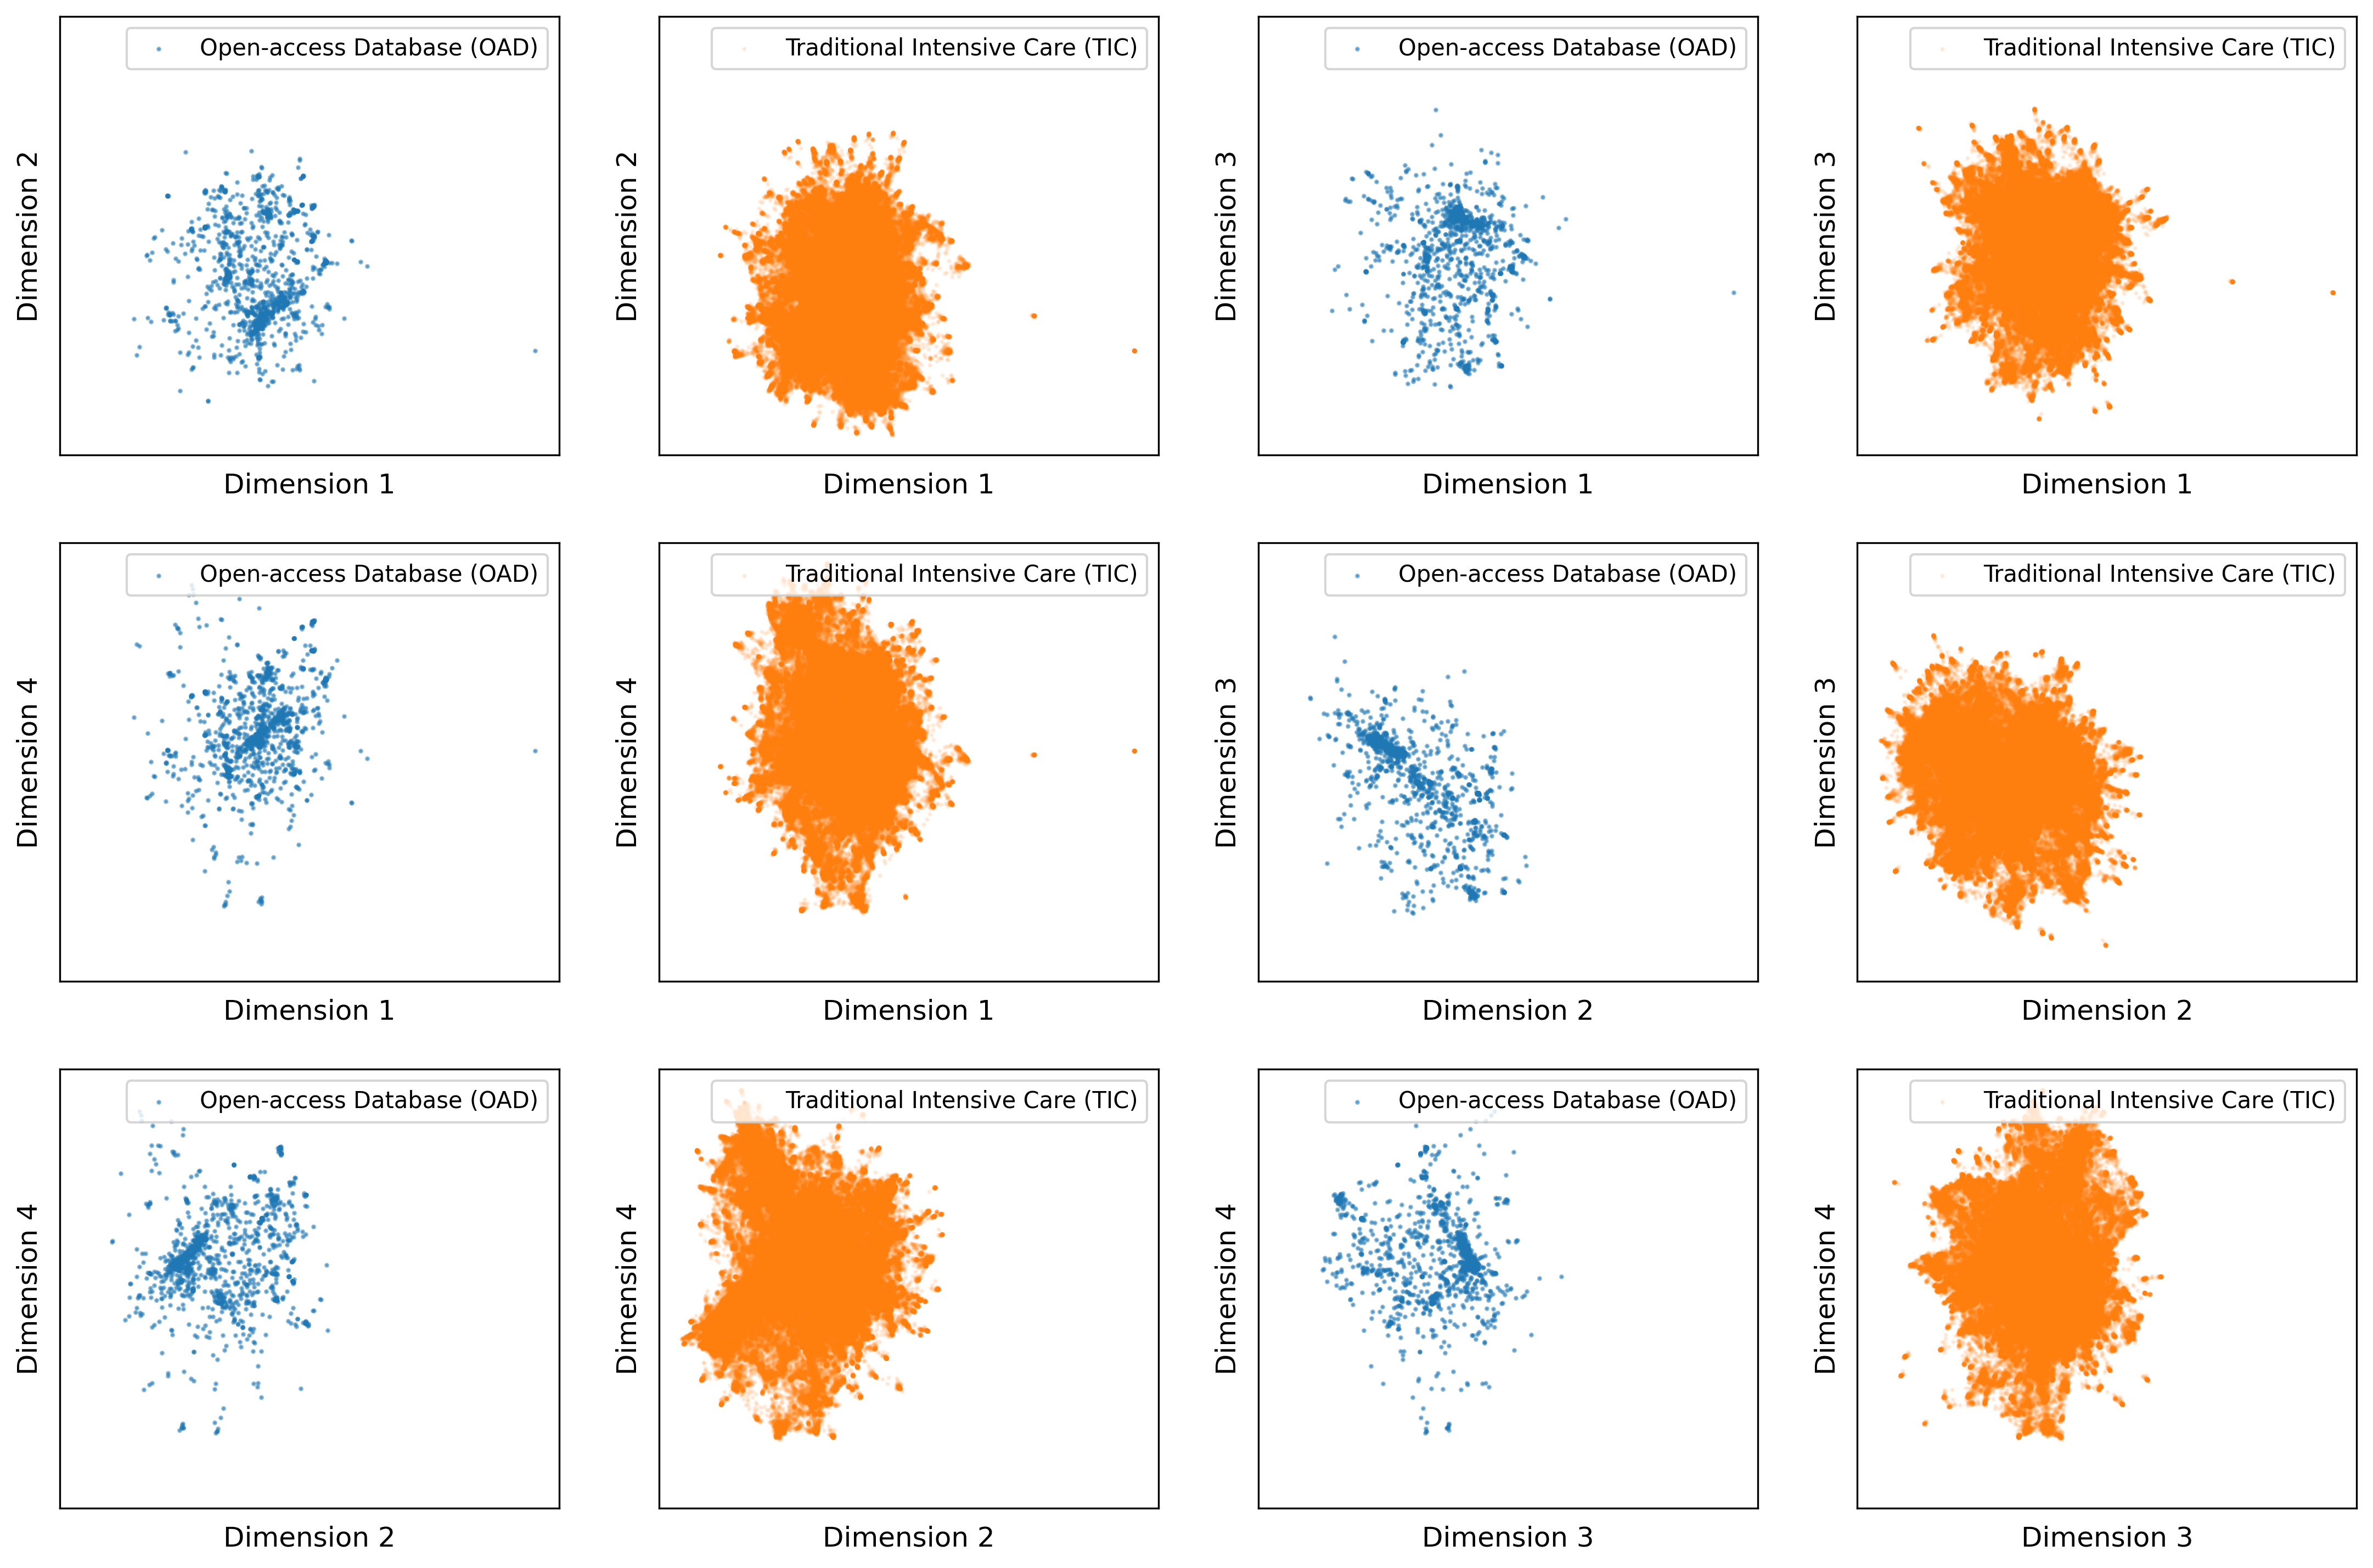

In [ ]:
fig,ax=plt.subplots(3,4,figsize=(18,12),sharex=True,sharey=True,dpi=300)
other=(np.isin(np.array(list(range(len(reduced_tfidf)))),database_index) == False)
ax1=plt.subplot(341)
ax2=plt.subplot(342)
ax3=plt.subplot(343)
ax4=plt.subplot(344)
ax5=plt.subplot(345)
ax6=plt.subplot(346)
ax7=plt.subplot(347)
ax8=plt.subplot(348)
ax9=plt.subplot(349)
ax10=plt.subplot(3,4,10)
ax11=plt.subplot(3,4,11)
ax12=plt.subplot(3,4,12)
ax1.scatter(reduced_tfidf[database_index,0],
            reduced_tfidf[database_index,1],alpha=0.5,label='Open-access Database (OAD)',c=col[0],s=5,marker=".")
ax1.set_xlabel("Dimension 1",size=12)
ax1.set_ylabel("Dimension 2",size=12)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.legend(loc="upper right")

ax2.scatter(reduced_tfidf[other_index,0],
            reduced_tfidf[other_index,1],alpha=0.1,label='Traditional Intensive Care (TIC)',c=col[1],s=5,marker=".")
ax2.set_xlabel("Dimension 1",size=12)
ax2.set_ylabel("Dimension 2",size=12)
ax2.legend()
ax2.set_xticks([])
ax2.set_yticks([])
ax2.legend(loc="upper right")

ax3.scatter(reduced_tfidf[database_index,0],
            reduced_tfidf[database_index,2],alpha=0.5,label='Open-access Database (OAD)',c=col[0],s=5,marker=".")
ax3.set_xlabel("Dimension 1",size=12)
ax3.set_ylabel("Dimension 3",size=12)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.legend(loc="upper right")

ax4.scatter(reduced_tfidf[other_index,0],
            reduced_tfidf[other_index,2],alpha=0.1,label='Traditional Intensive Care (TIC)',c=col[1],s=5,marker=".")
ax4.set_xlabel("Dimension 1",size=12)
ax4.set_ylabel("Dimension 3",size=12)
ax4.legend()
ax4.set_xticks([])
ax4.set_yticks([])
ax4.legend(loc="upper right")

ax5.scatter(reduced_tfidf[database_index,0],
            reduced_tfidf[database_index,3],alpha=0.5,label='Open-access Database (OAD)',c=col[0],s=5,marker=".")
ax5.set_xlabel("Dimension 1",size=12)
ax5.set_ylabel("Dimension 4",size=12)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.legend(loc="upper right")

ax6.scatter(reduced_tfidf[other_index,0],
            reduced_tfidf[other_index,3],alpha=0.1,label='Traditional Intensive Care (TIC)',c=col[1],s=5,marker=".")
ax6.set_xlabel("Dimension 1",size=12)
ax6.set_ylabel("Dimension 4",size=12)
ax6.legend()
ax6.set_xticks([])
ax6.set_yticks([])
ax6.legend(loc="upper right")

ax7.scatter(reduced_tfidf[database_index,1],
            reduced_tfidf[database_index,2],alpha=0.5,label='Open-access Database (OAD)',c=col[0],s=5,marker=".")
ax7.set_xlabel("Dimension 2",size=12)
ax7.set_ylabel("Dimension 3",size=12)
ax7.set_xticks([])
ax7.set_yticks([])
ax7.legend(loc="upper right")

ax8.scatter(reduced_tfidf[other_index,1],
            reduced_tfidf[other_index,2],alpha=0.1,label='Traditional Intensive Care (TIC)',c=col[1],s=5,marker=".")
ax8.set_xlabel("Dimension 2",size=12)
ax8.set_ylabel("Dimension 3",size=12)
ax8.legend()
ax8.set_xticks([])
ax8.set_yticks([])
ax8.legend(loc="upper right")

ax9.scatter(reduced_tfidf[database_index,1],
            reduced_tfidf[database_index,3],alpha=0.5,label='Open-access Database (OAD)',c=col[0],s=5,marker=".")
ax9.set_xlabel("Dimension 2",size=12)
ax9.set_ylabel("Dimension 4",size=12)
ax9.set_xticks([])
ax9.set_yticks([])
ax9.legend(loc="upper right")

ax10.scatter(reduced_tfidf[other_index,1],
            reduced_tfidf[other_index,3],alpha=0.1,label='Traditional Intensive Care (TIC)',c=col[1],s=5,marker=".")
ax10.set_xlabel("Dimension 2",size=12)
ax10.set_ylabel("Dimension 4",size=12)
ax10.legend()
ax10.set_xticks([])
ax10.set_yticks([])
ax10.legend(loc="upper right")

ax11.scatter(reduced_tfidf[database_index,2],
            reduced_tfidf[database_index,3],alpha=0.5,label='Open-access Database (OAD)',c=col[0],s=5,marker=".")
ax11.set_xlabel("Dimension 3",size=12)
ax11.set_ylabel("Dimension 4",size=12)
ax11.set_xticks([])
ax11.set_yticks([])
ax11.legend(loc="upper right")

ax12.scatter(reduced_tfidf[other_index,2],
            reduced_tfidf[other_index,3],alpha=0.1,label='Traditional Intensive Care (TIC)',c=col[1],s=5,marker=".")
ax12.set_xlabel("Dimension 3",size=12)
ax12.set_ylabel("Dimension 4",size=12)
ax12.legend()
ax12.set_xticks([])
ax12.set_yticks([])
ax12.legend(loc="upper right")


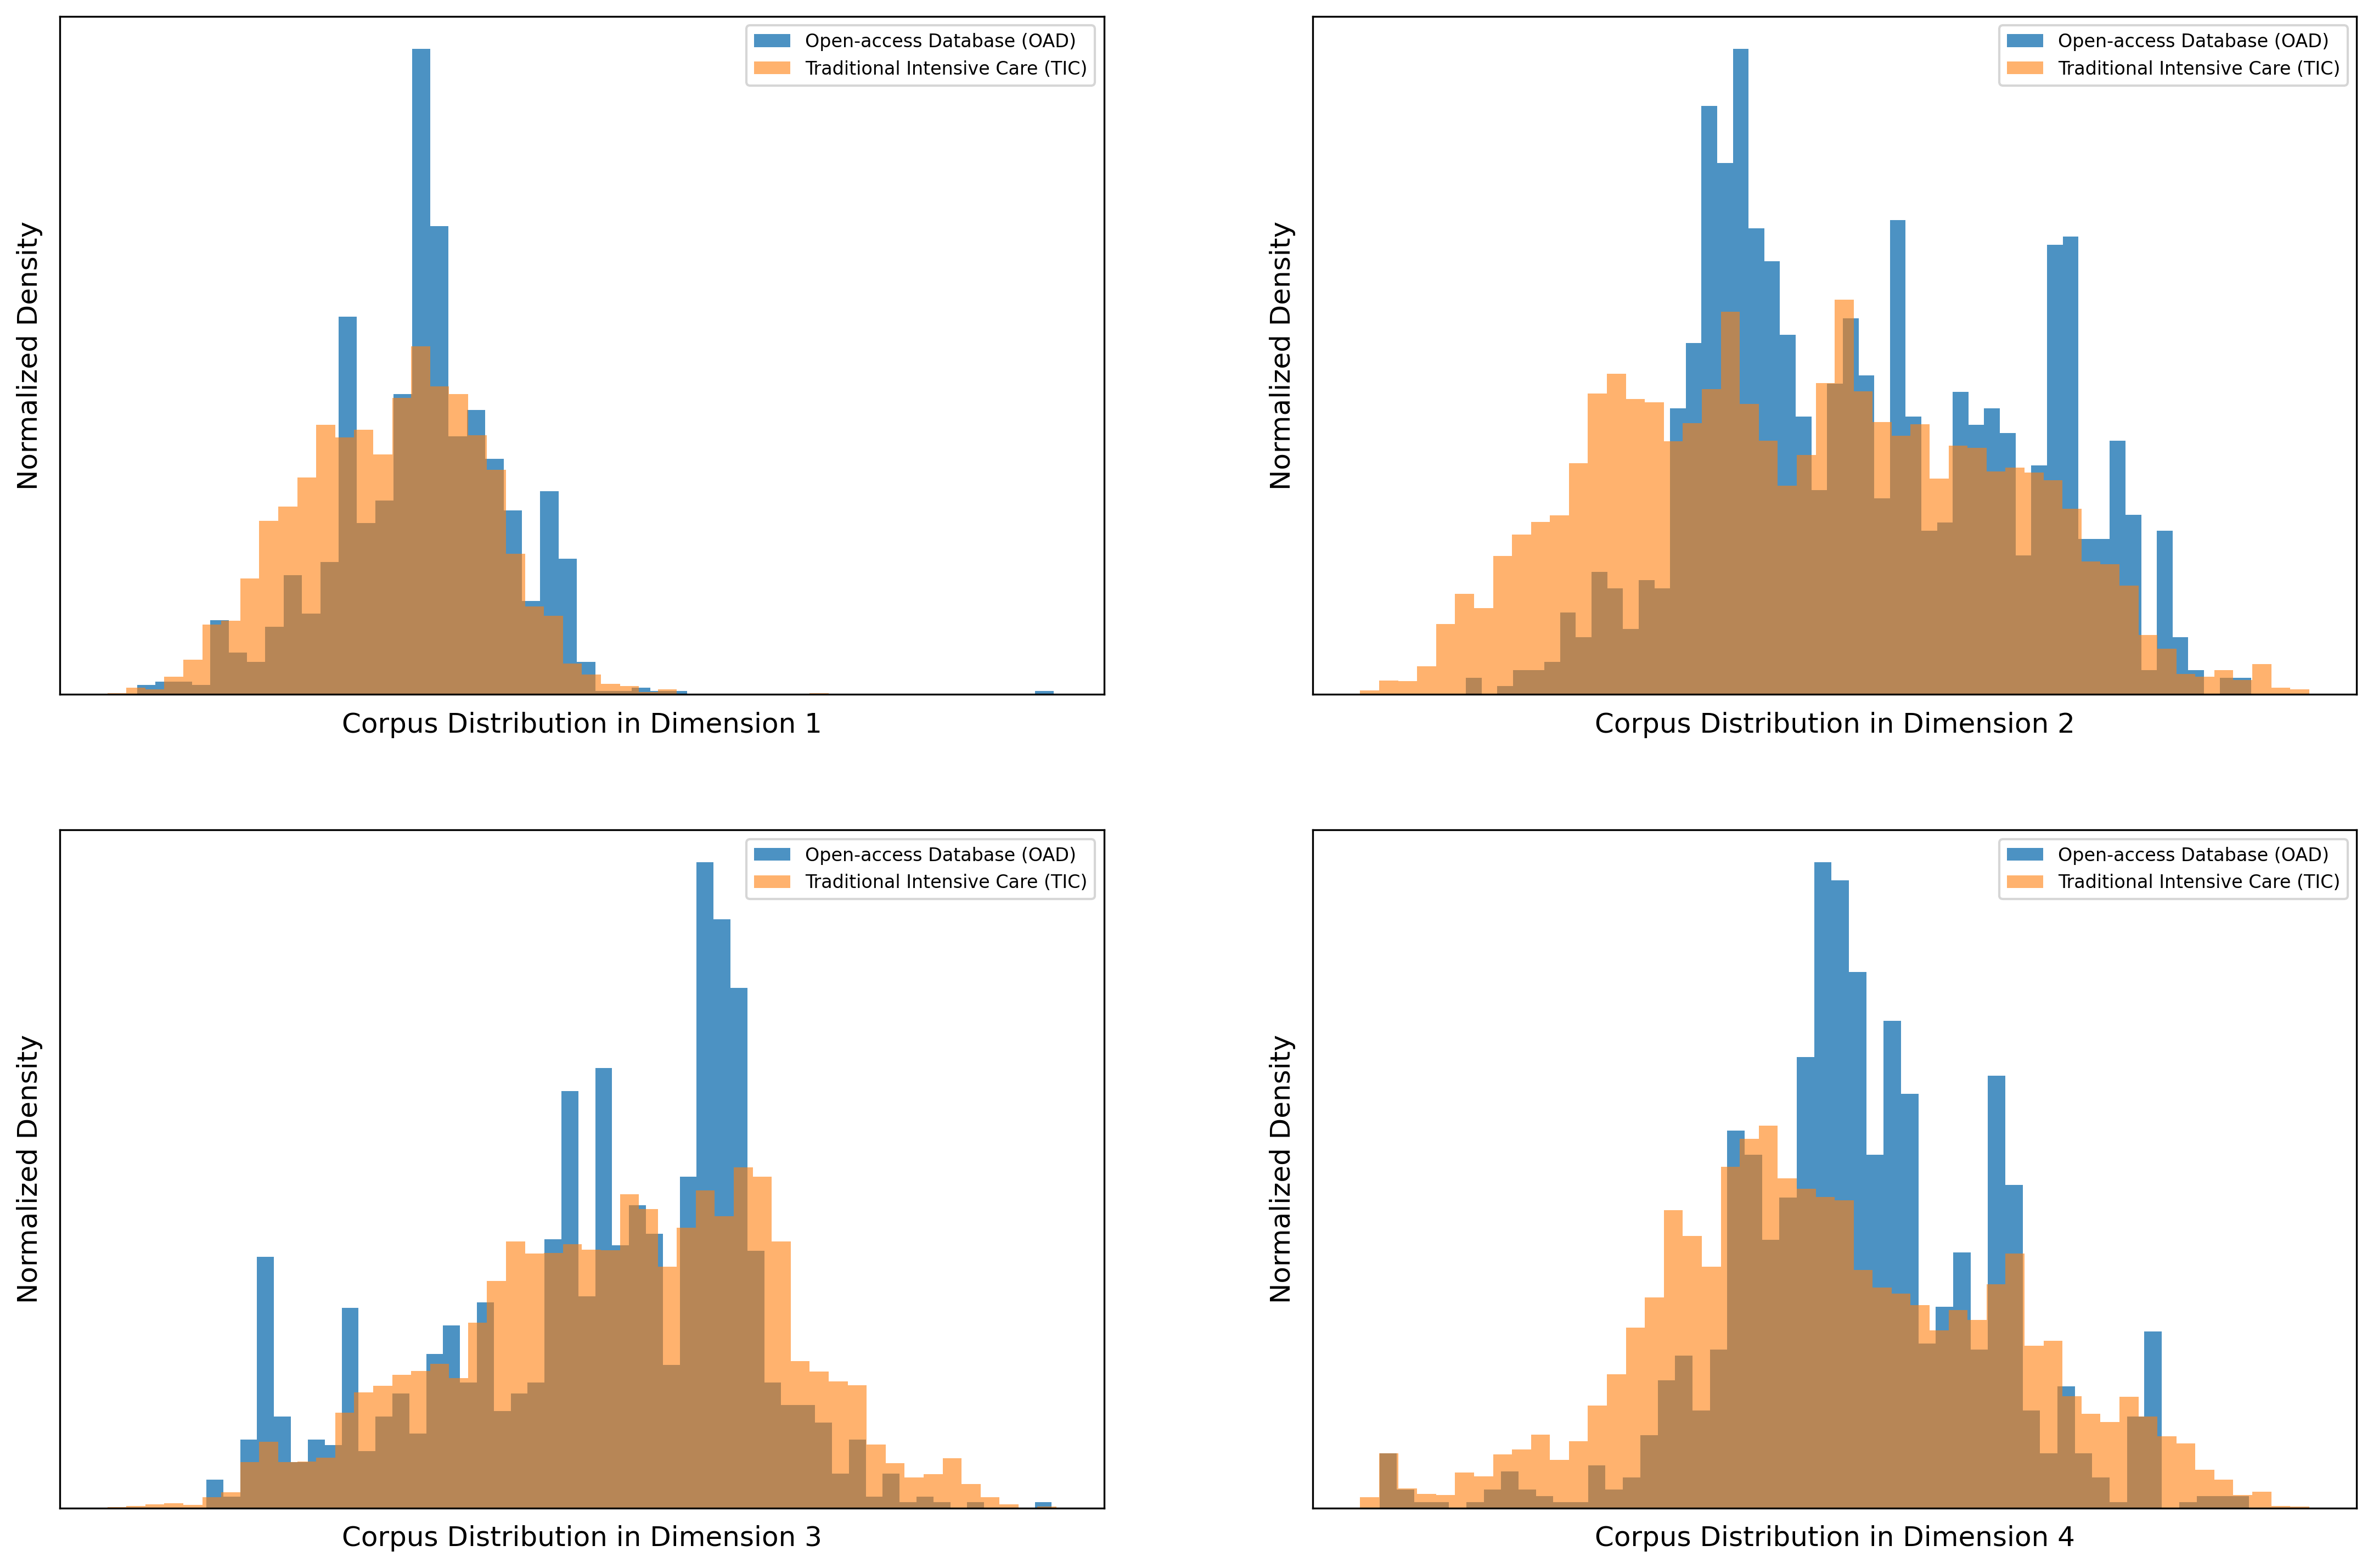

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(18,12),dpi=300)
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)
database_paper=ax1.hist(reduced_tfidf[database_index,0],density=True,alpha=0.8,bins=50,label='Open-access Database (OAD)')
other_paper=ax1.hist(reduced_tfidf[other_index,0],density=True,alpha=0.6,bins=50,label='Traditional Intensive Care (TIC)') 
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('Corpus Distribution in Dimension 1',size=12)
ax1.set_ylabel('Normalized Density',size=12)
ax1.legend(fontsize=8)
database_paper=ax2.hist(reduced_tfidf[database_index,1],density=True,alpha=0.8,bins=50,label='Open-access Database (OAD)')
other_paper=ax2.hist(reduced_tfidf[other_index,1],density=True,alpha=0.6,bins=50,label='Traditional Intensive Care (TIC)') 
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('Corpus Distribution in Dimension 2',size=12)
ax2.set_ylabel('Normalized Density',size=12)
ax2.legend(fontsize=8)
database_paper=ax3.hist(reduced_tfidf[database_index,2],density=True,alpha=0.8,bins=50,label='Open-access Database (OAD)')
other_paper=ax3.hist(reduced_tfidf[other_index,2],density=True,alpha=0.6,bins=50,label='Traditional Intensive Care (TIC)') 
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlabel('Corpus Distribution in Dimension 3',size=12)
ax3.set_ylabel('Normalized Density',size=12)
ax3.legend(fontsize=8)
database_paper=ax4.hist(reduced_tfidf[database_index,3],density=True,alpha=0.8,bins=50,label='Open-access Database (OAD)')
other_paper=ax4.hist(reduced_tfidf[other_index,3],density=True,alpha=0.6,bins=50,label='Traditional Intensive Care (TIC)') 
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xlabel('Corpus Distribution in Dimension 4',size=12)
ax4.set_ylabel('Normalized Density',size=12)
ax4.legend(fontsize=8)